## 강서구 와이파이 위치 표시

In [1]:
import folium
import pandas as pd

In [19]:
df_gs = pd.read_csv('서울시 강서구 공공와이파이 서비스 위치 정보.csv', encoding='cp949')

In [20]:
df_gs.head()

,관리번호,자치구,와이파이명,도로명주소,상세주소,설치위치(층),설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,X좌표,Y좌표,작업일자
0,BS100171,강서구,버스정류소_KBS스포츠월드,등촌동 665-13,16-009,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.850464,37.556602,58:16.0
1,BS100172,강서구,버스정류소_KBS스포츠월드,화곡동 1136-1,16-010,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.849236,37.556910,58:16.0
2,BS100173,강서구,버스정류소_KT가양지사,강서로 442,16-223,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840440,37.564820,58:16.0
3,BS100174,강서구,버스정류소_KT가양지사,가양동 1070답,16-224,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840096,37.564888,58:16.0
4,BS100175,강서구,버스정류소_가로공원.나누리병원,가로공원로 184-2,16-199,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.836450,37.536827,58:16.0


In [3]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gpd

In [5]:
geometry = gpd.points_from_xy(df_gs['X좌표'], df_gs['Y좌표'])
crs = "EPSG:4326"
gdf_points = gpd.GeoDataFrame(df_gs, crs=crs, geometry=geometry)

In [6]:
gdf = gpd.read_file('nlsp_003001001.shp', encoding='cp949')
gdf

,gid,lbl,val,geometry
0,11500110,1677.00,1677.0,"POLYGON ((938441.176 1956407.663, 938467.145 1..."
1,11500107,925.00,925.0,"MULTIPOLYGON (((940288.242 1950915.550, 940343..."
2,11500109,69891.00,69891.0,"POLYGON ((939989.911 1954982.128, 940009.523 1..."
3,11500102,74158.00,74158.0,"POLYGON ((942184.464 1951145.184, 942170.827 1..."
4,11500105,54572.00,54572.0,"MULTIPOLYGON (((941632.661 1952881.378, 941632..."
5,11500103,217000.00,217000.0,"POLYGON ((940794.698 1950032.919, 940831.048 1..."
6,11500104,44469.00,44469.0,"POLYGON ((942834.858 1952769.263, 942859.854 1..."
7,11500106,44832.00,44832.0,"POLYGON ((942206.060 1950818.779, 942218.912 1..."
8,11500101,40736.00,40736.0,"POLYGON ((943747.749 1951927.954, 943787.078 1..."
9,11500108,17898.00,17898.0,"POLYGON ((939659.713 1951878.676, 939659.052 1..."


In [7]:
dong_code = {'11500101':'염창동',
             '11500102':'등촌동',
             '11500103':'화곡동',
             '11500104':'가양동',
             '11500105':'마곡동',
             '11500106':'내발산동',
             '11500107':'외발산동',
             '11500108':'공항동',
             '11500109':'방화동',
             '11500110':'개화동',
             '11500111':'과해동',
             '11500112':'오곡동',
             '11500113':'오쇠동'}

In [8]:
gdf['dong'] = gdf['gid'].apply(lambda x: dong_code[x])
gdf

,gid,lbl,val,geometry,dong
0,11500110,1677.00,1677.0,"POLYGON ((938441.176 1956407.663, 938467.145 1...",개화동
1,11500107,925.00,925.0,"MULTIPOLYGON (((940288.242 1950915.550, 940343...",외발산동
2,11500109,69891.00,69891.0,"POLYGON ((939989.911 1954982.128, 940009.523 1...",방화동
3,11500102,74158.00,74158.0,"POLYGON ((942184.464 1951145.184, 942170.827 1...",등촌동
4,11500105,54572.00,54572.0,"MULTIPOLYGON (((941632.661 1952881.378, 941632...",마곡동
5,11500103,217000.00,217000.0,"POLYGON ((940794.698 1950032.919, 940831.048 1...",화곡동
6,11500104,44469.00,44469.0,"POLYGON ((942834.858 1952769.263, 942859.854 1...",가양동
7,11500106,44832.00,44832.0,"POLYGON ((942206.060 1950818.779, 942218.912 1...",내발산동
8,11500101,40736.00,40736.0,"POLYGON ((943747.749 1951927.954, 943787.078 1...",염창동
9,11500108,17898.00,17898.0,"POLYGON ((939659.713 1951878.676, 939659.052 1...",공항동


In [9]:
gdf = gdf.to_crs("EPSG:4326")

In [10]:
joined = gpd.sjoin(gdf, gdf_points, how='left', op='contains')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
joined

,gid,lbl,val,geometry,dong,index_right,관리번호,자치구,와이파이명,도로명주소,...,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,X좌표,Y좌표,작업일자,법정동,행정동
0,11500110,1677.00,1677.0,"POLYGON ((126.80258 37.60503, 126.80288 37.604...",개화동,22.0,BS100193,강서구,버스정류소_개화2치안센터,개화동 637-2,...,과기부WiFi,임대망,2021.0,실외,NaN,126.802220,37.575127,58:16.0,"방화동, 개화동",방화2동
0,11500110,1677.00,1677.0,"POLYGON ((126.80258 37.60503, 126.80288 37.604...",개화동,21.0,BS100192,강서구,버스정류소_개화2치안센터,개화동 564-5,...,과기부WiFi,임대망,2021.0,실외,NaN,126.802600,37.575195,58:16.0,"방화동, 개화동",방화2동
0,11500110,1677.00,1677.0,"POLYGON ((126.80258 37.60503, 126.80288 37.604...",개화동,972.0,GS200036,강서구,내촌공원,개화동 551-26,...,공공WiFi,자가망_U무선망,2020.0,실외,NaN,126.801500,37.577760,58:19.0,"방화동, 개화동",방화2동
0,11500110,1677.00,1677.0,"POLYGON ((126.80258 37.60503, 126.80288 37.604...",개화동,23.0,BS100194,강서구,버스정류소_개화검문소,개화동 477-31,...,과기부WiFi,임대망,2021.0,실외,NaN,126.800350,37.578457,58:16.0,"방화동, 개화동",방화2동
0,11500110,1677.00,1677.0,"POLYGON ((126.80258 37.60503, 126.80288 37.604...",개화동,1020.0,SBS210400,강서구,버스정류소_개화검문소,NaN,...,공공WiFi,NaN,2021.0,실외,NaN,126.799866,37.578530,58:20.0,"방화동, 개화동",방화2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,11500108,17898.00,17898.0,"POLYGON ((126.81676 37.56429, 126.81675 37.564...",공항동,863.0,GS170052,강서구,공항동,방화대로6바길 5-14,...,공공WiFi,자가망_U무선망,2020.0,실외,NaN,126.818855,37.555607,58:19.0,"마곡동, 공항동, 방화동, 과해동, 오곡동, 오쇠동",공항동
9,11500108,17898.00,17898.0,"POLYGON ((126.81676 37.56429, 126.81675 37.564...",공항동,861.0,GS170050,강서구,공항동,방화대로8길 28,...,공공WiFi,자가망_U무선망,2020.0,실외,NaN,126.816986,37.556152,58:19.0,"마곡동, 공항동, 방화동, 과해동, 오곡동, 오쇠동",공항동
10,11500113,3.00,3.0,"POLYGON ((126.80181 37.55127, 126.80185 37.551...",오쇠동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11500112,9.00,9.0,"POLYGON ((126.79736 37.56046, 126.79736 37.560...",오곡동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
gs_wifi = joined.groupby('dong')['관리번호'].count()
gs_wifi

dong
가양동     179
개화동      30
공항동      67
과해동       1
내발산동    115
등촌동     206
마곡동     191
방화동     190
염창동      72
오곡동       0
오쇠동       0
외발산동     10
화곡동     527
Name: 관리번호, dtype: int64

In [ ]:
df_gs.head()

,관리번호,자치구,와이파이명,도로명주소,상세주소,설치위치(층),설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,X좌표,Y좌표,작업일자,법정동,행정동
0,BS100171,강서구,버스정류소_KBS스포츠월드,등촌동 665-13,16-009,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.850464,37.556602,58:16.0,등촌동,등촌3동
1,BS100172,강서구,버스정류소_KBS스포츠월드,화곡동 1136-1,16-010,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.849236,37.556910,58:16.0,등촌동,등촌3동
2,BS100173,강서구,버스정류소_KT가양지사,강서로 442,16-223,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840440,37.564820,58:16.0,등촌동,등촌3동
3,BS100174,강서구,버스정류소_KT가양지사,가양동 1070답,16-224,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840096,37.564888,58:16.0,등촌동,등촌3동
4,BS100175,강서구,버스정류소_가로공원.나누리병원,가로공원로 184-2,16-199,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.836450,37.536827,58:16.0,화곡동,화곡1동


In [ ]:
df_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리번호      1591 non-null   object 
 1   자치구       1591 non-null   object 
 2   와이파이명     1591 non-null   object 
 3   도로명주소     1558 non-null   object 
 4   상세주소      666 non-null    object 
 5   설치위치(층)   15 non-null     float64
 6   설치유형      1591 non-null   object 
 7   설치기관      1591 non-null   object 
 8   서비스구분     1591 non-null   object 
 9   망종류       1558 non-null   object 
 10  설치년도      1591 non-null   int64  
 11  실내외구분     1591 non-null   object 
 12  wifi접속환경  12 non-null     object 
 13  X좌표       1591 non-null   float64
 14  Y좌표       1591 non-null   float64
 15  작업일자      1591 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 199.0+ KB


In [ ]:
# 위도: Y좌표
latitude = 37.556602
# 경도: X좌표
longitude = 126.850464

In [ ]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )
m

In [ ]:
for i in range(len(df_gs)):
    lat = df_gs['Y좌표'][i]
    lnt = df_gs['X좌표'][i]
    folium.Marker([lat, lnt],
              popup=df_gs['도로명주소'][i],
              icon=folium.Icon('red', icon='star'),
             ).add_to(m)
m

In [ ]:
lat_list = df_gs['Y좌표'].tolist() # 위도 
lnt_list = df_gs['X좌표'].tolist() # 경도

In [ ]:
len(lat_list), len(lnt_list)

(1591, 1591)

In [ ]:
latlnt = zip(lat_list, lnt_list)

In [ ]:
for x, y in latlnt:
    print(x, y)
    

37.556602 126.850464
37.55691 126.849236
37.56482 126.84044
37.564888 126.840096
37.536827 126.83645
37.537178 126.836296
37.56948 126.84764
37.56418 126.85564
37.55981 126.863304
37.564243 126.85513
37.55972 126.86384
37.56848 126.84965
37.56145 126.85397
37.562164 126.85339
37.56046 126.856606
37.570507 126.84381
37.57562 126.81652
37.554756 126.85578
37.555237 126.85409
37.549683 126.819496
37.55723 126.86172
37.575195 126.8026
37.575127 126.80222
37.578457 126.80035
37.56991 126.838165
37.559086 126.80818
37.564747 126.811386
37.56322 126.81631
37.562458 126.81676
37.560726 126.8158
37.560738 126.817154
37.57272 126.81159
37.555447 126.865486
37.56559 126.85322
37.544064 126.83823
37.56261 126.84311
37.549004 126.86865
37.54941 126.8676
37.552628 126.86156
37.552864 126.86053
37.55935 126.83187
37.559284 126.83171
37.55491 126.82642
37.554787 126.82606
37.55747 126.82641
37.557438 126.82675
37.559696 126.827515
37.559692 126.82604
37.55849 126.83916
37.558575 126.83761
37.556038 12

In [ ]:
from shapely.geometry import Polygon

In [ ]:
polygon_geom = Polygon(zip(lnt_list, lat_list))
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
polygon.to_file(filename='polygon.gpkg', driver="GPKG")
polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

<Axes: >

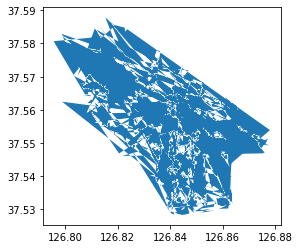

In [ ]:
p_gdf = gpd.read_file('polygon.shp')
p_gdf.plot()

In [ ]:
p_gdf.head()

,FID,geometry
0,0,"POLYGON ((126.85046 37.55660, 126.84924 37.556..."


In [ ]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 115.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.0 MB/s eta 0:00:00


In [ ]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

In [ ]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df_gs['X좌표'], df_gs['Y좌표'])]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df_gs, crs=crs, geometry=geometry)

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
boundary = gpd.read_file('nlsp_003001001.shp', encoding='cp949')

In [ ]:
gdf.head()

,관리번호,자치구,와이파이명,도로명주소,상세주소,설치위치(층),설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,X좌표,Y좌표,작업일자,법정동,행정동,geometry
0,BS100171,강서구,버스정류소_KBS스포츠월드,등촌동 665-13,16-009,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.850464,37.556602,58:16.0,등촌동,등촌3동,POINT (126.85046 37.55660)
1,BS100172,강서구,버스정류소_KBS스포츠월드,화곡동 1136-1,16-010,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.849236,37.556910,58:16.0,등촌동,등촌3동,POINT (126.84924 37.55691)
2,BS100173,강서구,버스정류소_KT가양지사,강서로 442,16-223,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840440,37.564820,58:16.0,등촌동,등촌3동,POINT (126.84044 37.56482)
3,BS100174,강서구,버스정류소_KT가양지사,가양동 1070답,16-224,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840096,37.564888,58:16.0,등촌동,등촌3동,POINT (126.84010 37.56489)
4,BS100175,강서구,버스정류소_가로공원.나누리병원,가로공원로 184-2,16-199,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.836450,37.536827,58:16.0,화곡동,화곡1동,POINT (126.83645 37.53683)


In [ ]:
gs_wifi = df_gs.groupby('법정동')['관리번호'].count()
gs_wifi
gdf.groupby

In [ ]:
poly = Polygon([[p.x, p.y] for p in geometry])

<Axes: >

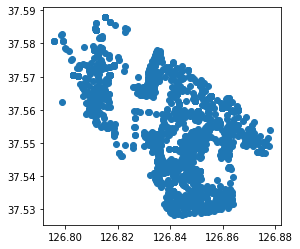

In [ ]:
gdf.plot()

In [ ]:
# 중심 좌표 설정
# 지도 중심점 설정
center = [37.5665, 126.9784]

# folium 지도 생성
m = folium.Map(location=center, zoom_start=11)

# Choropleth 클래스를 사용하여 지도에 시각화
folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data=p_gdf,
    columns=['Y좌표', 'X좌표'],
    key_on='feature.properties.Y좌표',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value'
).add_to(m)

# 지도에 행정동명 추가
folium.GeoJson(
    gdf,
    name='geojson',
    tooltip=folium.features.GeoJsonTooltip(fields=['행정동'], aliases=['동'], localize=True),
).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map.html')

m

KeyError: ignored

In [ ]:
seoul_boundary = gpd.read_file('서울시구경계.shp', encoding='cp949')
p_gs = gpd.read_file('polygon.shp')
gs_boundary = seoul_boundary[seoul_boundary['SIGUNGU_NM'] == '강서구']

<Axes: >

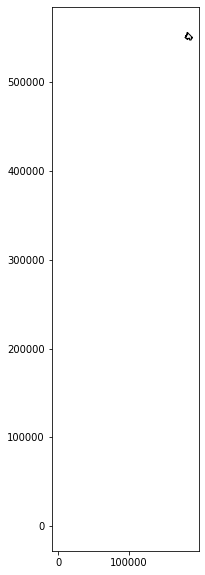

In [ ]:
ax = gs_boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)

p_gs.plot(ax=ax, color='deepskyblue', markersize=10)

## GIS를 법정동으로 변환

In [ ]:
# https://parkgihyeon.github.io/project/geocoding-api/#2-%EC%97%AD%EC%A7%80%EC%98%A4%EC%BD%94%EB%94%A9-%EC%9C%84%EB%8F%84-%EA%B2%BD%EB%8F%84-%EC%A2%8C%ED%91%9C%EB%A5%BC-%ED%86%B5%ED%95%B4-%EC%A3%BC%EC%86%8C-%EC%96%BB%EA%B8%B0
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return str(address)

In [ ]:
h2b = pd.read_csv('POS00006M_202201.csv')
h2b.head()

,LGDNG_CD,CTPV_NM,CTGG_NM,ADSTRD_NM,ADSTRD_EN_NM,LGDNG_NM,LGDNG_EN_NM,ADSTRD_CD
0,1100000000,서울특별시,서울특별시,서울특별시,Seoul,서울특별시,NaN,1100000000
1,1111000000,서울특별시,종로구,종로구,Jongno-gu,종로구,NaN,1111000000
2,1111010100,서울특별시,종로구,청운효자동,Cheongunhyoja-dong,청운동,Cheongun-dong,1111051500
3,1111010200,서울특별시,종로구,청운효자동,Cheongunhyoja-dong,신교동,Singyo-dong,1111051500
4,1111010300,서울특별시,종로구,청운효자동,Cheongunhyoja-dong,궁정동,Gungjeong-dong,1111051500


In [ ]:
h2b = h2b[(h2b['CTPV_NM'] == '서울특별시') & (h2b['CTGG_NM'] == '강서구')].reset_index()
h2b

,index,LGDNG_CD,CTPV_NM,CTGG_NM,ADSTRD_NM,ADSTRD_EN_NM,LGDNG_NM,LGDNG_EN_NM,ADSTRD_CD
0,509,1150000000,서울특별시,강서구,강서구,Gangseo-gu,강서구,NaN,1150000000
1,510,1150010100,서울특별시,강서구,염창동,Yeomchang-dong,염창동,Yeomchang-dong,1150051000
2,511,1150010400,서울특별시,강서구,염창동,Yeomchang-dong,가양동,Gayang-dong,1150051000
3,512,1150010200,서울특별시,강서구,등촌1동,Deungchon 1(il)-dong,등촌동,Deungchon-dong,1150052000
4,513,1150010200,서울특별시,강서구,등촌2동,Deungchon 2(i)-dong,등촌동,Deungchon-dong,1150053000
5,514,1150010200,서울특별시,강서구,등촌3동,Deungchon 3(sam)-dong,등촌동,Deungchon-dong,1150053500
6,515,1150010300,서울특별시,강서구,화곡1동,Hwagok 1(il)-dong,화곡동,Hwagok-dong,1150054000
7,516,1150010300,서울특별시,강서구,화곡2동,Hwagok 2(i)-dong,화곡동,Hwagok-dong,1150055000
8,517,1150010300,서울특별시,강서구,화곡3동,Hwagok 3(sam)-dong,화곡동,Hwagok-dong,1150056000
9,518,1150010300,서울특별시,강서구,화곡4동,Hwagok 4(sa)-dong,화곡동,Hwagok-dong,1150057000


In [ ]:
h2b[h2b['ADSTRD_NM'] == '공항동']['LGDNG_NM']

22    마곡동
23    공항동
24    방화동
25    과해동
26    오곡동
27    오쇠동
Name: LGDNG_NM, dtype: object

In [ ]:
# df.index[df['B'] == 19]
h2b.index[h2b['ADSTRD_NM'] == '등촌1동'].tolist()

[3]

In [ ]:
len(df_gs)

1591

In [ ]:
df_gs['법정동'] = ''
df_gs['행정동'] = ''

In [ ]:
# # address = geocoding_reverse('36.5760732781656, 128.15935928504484')
# # print(address)
# h_dong = []
b_dong = {}
for i in range(len(df_gs)):
    lat = df_gs['Y좌표'][i] # 위도
    lnt = df_gs['X좌표'][i] # 경도
    if lat != 0.0 and lnt != 0.0:
        h_dong = geocoding_reverse('{}, {}'.format(lat, lnt)).split(',')[-5].strip()
        # print(', '.join(h2b[h2b['ADSTRD_NM'] == '등촌1동']['LGDNG_NM'].values))
        df_gs['법정동'][i] = ', '.join(h2b[h2b['ADSTRD_NM'] == h_dong]['LGDNG_NM'].values)
        df_gs['행정동'][i] = h_dong
        # print(df_gs['법정동'][i])
        print(i, end=' ')
    else:
        continue

<ipython-input-12-3f3e49ae5dba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gs['법정동'][i] = ', '.join(h2b[h2b['ADSTRD_NM'] == h_dong]['LGDNG_NM'].values)
<ipython-input-12-3f3e49ae5dba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gs['행정동'][i] = h_dong


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
# to_csv("test2.csv", header = False, index = False, encoding='utf-8-sig')
df_gs.to_csv('강서구_공공와이파이_행정동 및 법정동 추가.csv', index=False, encoding='utf-8-sig')

In [ ]:
lat = df_gs['Y좌표'][1590] # 위도
lnt = df_gs['X좌표'][1590] # 경도
print(lat, lnt)
# geocoding_reverse('{}, {}'.format(lat, lnt)).split(',')[-5].strip()

In [ ]:
# df_gs['법정동'][1352]
df_gs['법정동'][1590]

'화곡동'

## 강서구 행정동 와이파이 서비스 정보

In [13]:
import matplotlib.pyplot as plt

In [14]:
# 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [15]:
# ctrl(cmd) + /
plt.rc('font', family='NanumBarunGothic') 

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [ ]:
gs_wifi = df_gs.groupby('법정동')['관리번호'].count()
gs_wifi

법정동
                                  7
가양동                             138
가양동, 마곡동                        241
등촌동                             203
마곡동, 공항동, 방화동                    54
마곡동, 공항동, 방화동, 과해동, 오곡동, 오쇠동     72
마곡동, 내발산동, 외발산동                 101
방화동                              68
방화동, 개화동                         85
염창동, 가양동                         71
화곡동                             487
화곡동, 내발산동                        64
Name: 관리번호, dtype: int64

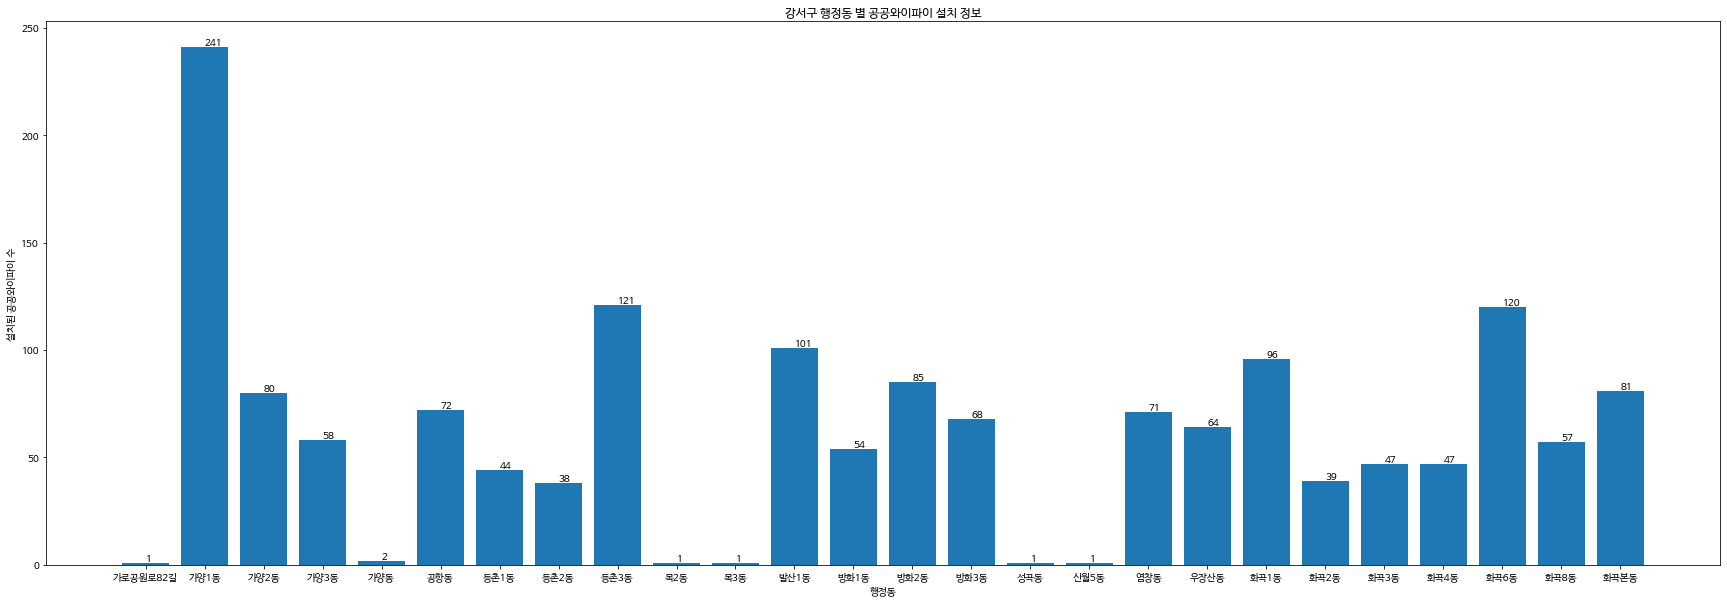

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(gs_wifi.index, gs_wifi.values)
plt.title('강서구 행정동 별 공공와이파이 설치 정보')
plt.xlabel('행정동')
plt.ylabel('설치된 공공와이파이 수')
for idx, val in gs_wifi.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

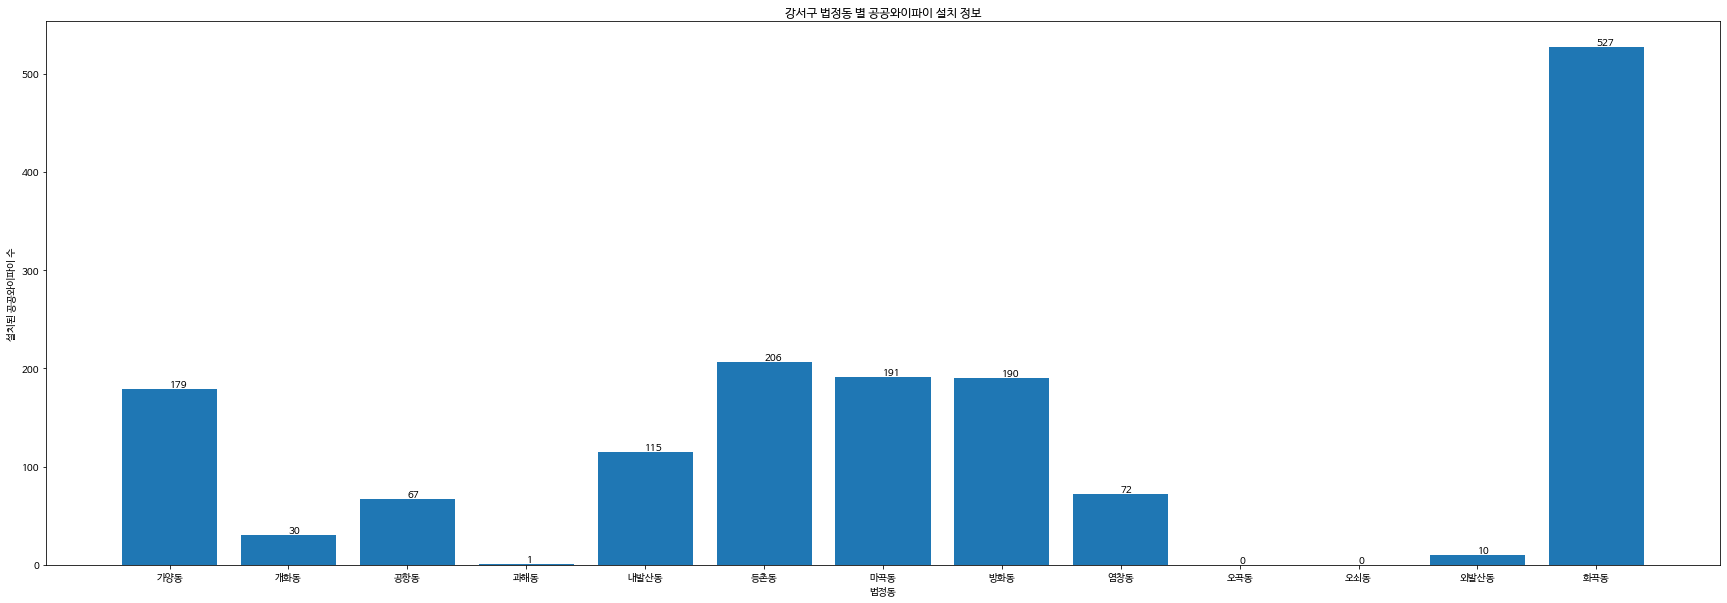

In [16]:
plt.figure(figsize=(30, 10))
plt.bar(gs_wifi.index, gs_wifi.values)
plt.title('강서구 법정동 별 공공와이파이 설치 정보')
plt.xlabel('법정동')
plt.ylabel('설치된 공공와이파이 수')
for idx, val in gs_wifi.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

## 서울시 와이파이 서비스 정보

In [21]:
df_seoul = pd.read_csv('서울시 공공와이파이 서비스 위치 정보.csv', encoding='EUC-KR')
df_seoul.head()

,관리번호,자치구,와이파이명,도로명주소,상세주소,설치위치(층),설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,Y좌표,X좌표,작업일자
0,ARI00001,서대문구,상수도사업본부,서소문로 51,본관 1F,NaN,7-1. 공공 - 행정,서울시(AP),공공WiFi,자가망_수도사업소망,2019,실내,NaN,126.96675,37.561924,2023-03-14 10:58:16.0
1,ARI00002,서대문구,상수도사업본부,서소문로 51,본관 2F,NaN,7-1. 공공 - 행정,서울시(AP),공공WiFi,자가망_수도사업소망,2019,실내,NaN,126.96675,37.561924,2023-03-14 10:58:16.0
2,ARI00003,서대문구,상수도사업본부,서소문로 51,본관 2F,NaN,7-1. 공공 - 행정,서울시(AP),공공WiFi,자가망_수도사업소망,2019,실내,NaN,126.96675,37.561924,2023-03-14 10:58:16.0
3,ARI00004,서대문구,상수도사업본부,서소문로 51,본관 2F,NaN,7-1. 공공 - 행정,서울시(AP),공공WiFi,자가망_수도사업소망,2019,실내,NaN,126.96675,37.561924,2023-03-14 10:58:16.0
4,ARI00005,서대문구,상수도사업본부,서소문로 51,본관 2F,NaN,7-1. 공공 - 행정,서울시(AP),공공WiFi,자가망_수도사업소망,2019,실내,NaN,126.96675,37.561924,2023-03-14 10:58:16.0


In [ ]:
# 비어있는 값이 없는 관리번호, 자치구 컬럼 사용
df_seoul.info()

In [ ]:
total_wifi = df_seoul.groupby('자치구')['관리번호'].count()
total_wifi

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(total_wifi.index, total_wifi.values)
plt.title('서울시 자치구 별 공공와이파이 설치 정보')
plt.xlabel('자치구')
plt.ylabel('설치된 공공와이파이 수')
for idx, val in total_wifi.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

In [ ]:
total_wifi.idxmax(axis=0)

In [ ]:
total_wifi['강서구']

## 강서구 스마트 횡단보도

In [ ]:
df_scw = pd.read_csv('서울특별시 강서구_스마트횡단보도 설치 현황_20220324.csv', encoding='EUC-KR')
df_scw

,주소,위치,위도,경도,설치일자,설치 장비(대수),비고,데이터 기준일자
0,서울틀별시 강서구 화곡로 302,강서구청 앞,37.551042,126.849191,2020-10-16,"대기인센서(2), 집중조명(2), 로고젝터(2), 보행신호 음성안내 보조장치(2),...",바닥신호등은 도로과에서 설치,2022-03-24
1,서울틀별시 강서구 강서로5길 64,KT화곡전화국 앞,37.529634,126.848029,2020-10-16,"대기인센서(2), 집중조명(2), 로고젝터(2), 보행신호 음성안내 보조장치(2),...",바닥신호등은 도로과에서 설치,2022-03-24
2,서울틀별시 강서구 강서로 301,명덕여고사거리 내인당약국 앞,37.552728,126.836298,2020-10-16,"대기인센서(2), 집중조명(2), 로고젝터(2), 보행신호 음성안내 보조장치(2),...",바닥신호등은 도로과에서 설치,2022-03-24
3,서울틀별시 강서구 강서로 506,대아아파트앞 교차로 더베스트커피 앞,37.570890,126.841845,2020-10-16,"대기인센서(2), 집중조명(2), 로고젝터(2), 보행신호 음성안내 보조장치(2),...",바닥신호등은 도로과에서 설치,2022-03-24
4,서울틀별시 강서구 허준로 209,가양초교앞 교차로 가양7단지 크린토피아 앞,37.561636,126.859988,2020-10-16,"대기인센서(2), 집중조명(2), 로고젝터(2), 보행신호 음성안내 보조장치(2),...",바닥신호등은 도로과에서 설치,2022-03-24
5,서울틀별시 강서구 허준로 175,가양6단지 앞,37.562638,126.858409,2020-11-17,바닥신호등(2),바닥신호등은 도로과에서 설치,2022-03-24


In [ ]:
df_scw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   주소         6 non-null      object 
 1   위치         6 non-null      object 
 2   위도         6 non-null      float64
 3   경도         6 non-null      float64
 4   설치일자       6 non-null      object 
 5   설치 장비(대수)  6 non-null      object 
 6   비고         6 non-null      object 
 7   데이터 기준일자   6 non-null      object 
dtypes: float64(2), object(6)
memory usage: 512.0+ bytes


In [ ]:
df_scw['법정동'] = ''
df_scw['행정동'] = ''

In [ ]:
for i in range(len(df_scw)):
    lat = df_scw['위도'][i]
    lnt = df_scw['경도'][i]
    h_dong = geocoding_reverse('{}, {}'.format(lat, lnt)).split(',')[-5].strip()
    df_scw['법정동'][i] = ', '.join(h2b[h2b['ADSTRD_NM'] == h_dong]['LGDNG_NM'].values)
    df_scw['행정동'][i] = h_dong

<ipython-input-32-01422cad3cdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scw['법정동'][i] = ', '.join(h2b[h2b['ADSTRD_NM'] == h_dong]['LGDNG_NM'].values)
<ipython-input-32-01422cad3cdc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scw['행정동'][i] = h_dong


In [ ]:
df_scw.to_csv('강서구_스마트횡단보도_행정동 및 법정동 추가.csv', index=False, encoding='utf-8-sig')

## 서울시 신호등

In [ ]:
df_cw = pd.read_csv('서울시 신호등 관련 정보.csv', encoding='EUC-KR')
df_cw.head()

,부착대관리번호,상태 (공통),부착방식,부착대길이,고가 (공통),부착대방향,신호등수량,배면등수량,신호등종류,배면등종류,...,작업구분 (공통),표출구분 (공통),신규정규화ID,공사관리번호,부착대관리번호.1,이력ID,위치정보,X좌표,Y좌표,공사형태 (공통)
0,03-0000062031,1.0,2.0,NaN,1.0,187,1.0,0.0,7.0,NaN,...,1,2.0,NaN,2012-1101-036,03-062031,88129,NaN,200136.57813,553961.62500,NaN
1,03-0000045095,1.0,3.0,6.0,1.0,40,4.0,2.0,1.0,1.0,...,4,1.0,NaN,2008-0101-011,03-045095,91642,NaN,197174.53373,551805.44139,NaN
2,03-0000005263,1.0,2.0,999.0,1.0,288,1.0,0.0,12.0,NaN,...,1,NaN,NaN,2000-0000-000,03-005263,94427,NaN,190817.26970,543341.18430,NaN
3,03-0000005256,1.0,2.0,1.0,1.0,105,1.0,0.0,1.0,1.0,...,2,1.0,NaN,2003-1401-003,03-005256,87526,NaN,189065.65699,542904.50176,NaN
4,03-0000048452,1.0,3.0,999.0,1.0,294,1.0,0.0,7.0,NaN,...,4,1.0,NaN,2006-0101-022,03-048452,91643,NaN,204032.94903,541395.50254,NaN


## 좌표계 변환

In [ ]:
!pip3 install Proj
!pip3 install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.9 MB/s eta 0:00:00


In [ ]:
from pyproj import Proj, transform

In [ ]:
epsg5179= Proj(init="epsg:5186")
wgs84=Proj(init='epsg:4326')
 
x1, y1 = transform(epsg5179, wgs84, 변경하고자하는 x값, 변경하고자하는 y값)
 
print('변경 후: ', x1, y1) 